In [2]:
import pandas as pd


In [3]:

df = pd.read_csv(r"C:\Users\user\Downloads\Kenya_Sales_Data.csv")



In [4]:
df.head()

,Invoice_ID,Date,Branch,Product_Category,Product_Name,Unit_Price,Quantity,Total_Sales,Payment_Method
0,INV0001,2025-08-03,Nakuru,Electronics,Laptop,3673.37,7,25713.59,Card
1,INV0002,2025-05-30,Kisumu,Clothing,Shoes,1701.86,8,13614.88,Mobile Money
2,INV0003,2025-07-11,Eldoret,Groceries,Cooking Oil,4170.59,6,25023.54,Card
3,INV0004,2025-02-18,Nakuru,Electronics,TV,1556.00,12,18672.00,Cash
4,INV0005,2025-07-09,Kisumu,Clothing,Jacket,740.49,16,11847.84,Mobile Money


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
df.columns


Index(['Invoice_ID', 'Date', 'Branch', 'Product_Category', 'Product_Name',
       'Unit_Price', 'Quantity', 'Total_Sales', 'Payment_Method'],
      dtype='object')

In [12]:
sns.set(style="whitegrid", palette="Set2")
%matplotlib inline

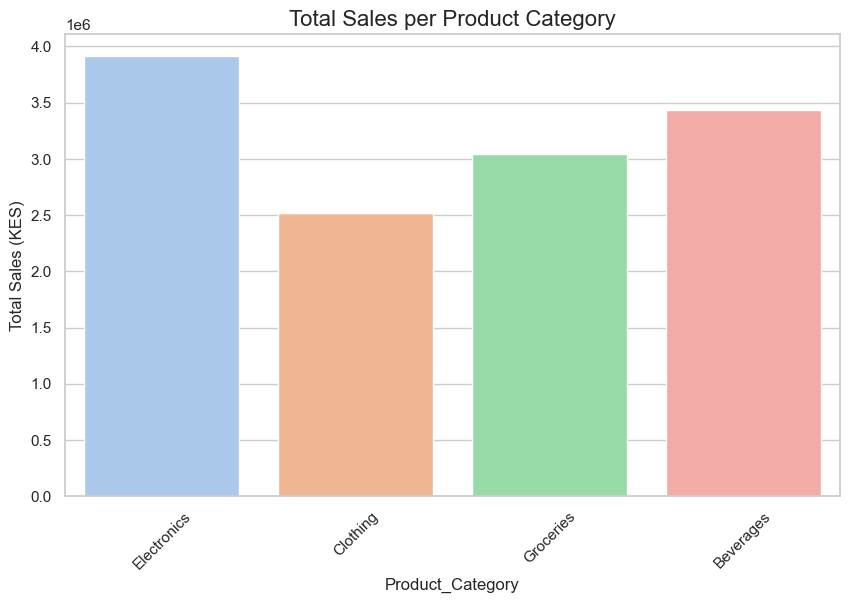

In [16]:
plt.figure(figsize=(10,6))
sns.barplot(
    x='Product_Category',
    y='Total_Sales',
    hue='Product_Category',
    data=df,
    estimator=sum,
    errorbar=None,
    legend=False,
    palette="pastel"
)
plt.title("Total Sales per Product Category", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Total Sales (KES)")
plt.show()


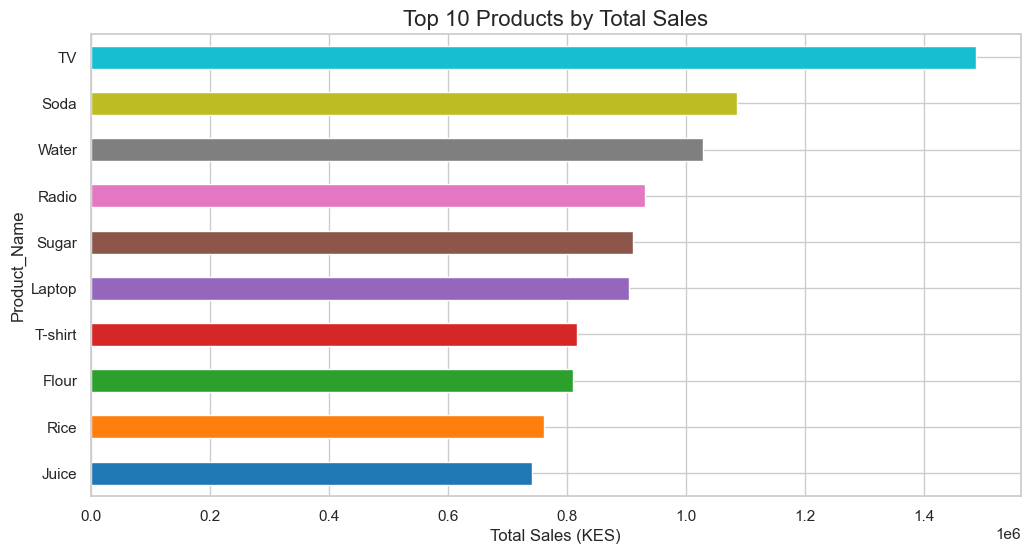

In [17]:
top_products = df.groupby('Product_Name')['Total_Sales'].sum().sort_values(ascending=True).tail(10)
plt.figure(figsize=(12,6))
top_products.plot(kind='barh', color=sns.color_palette("tab10", 10))
plt.title("Top 10 Products by Total Sales", fontsize=16)
plt.xlabel("Total Sales (KES)")
plt.show()


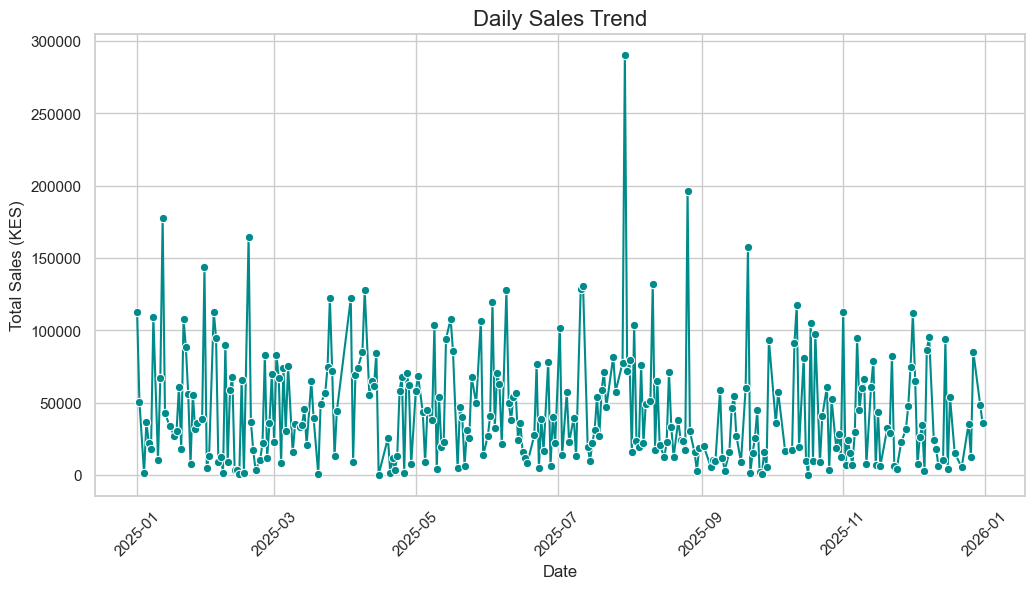

In [18]:
daily_sales = df.groupby('Date')['Total_Sales'].sum()
plt.figure(figsize=(12,6))
sns.lineplot(x=daily_sales.index, y=daily_sales.values, marker='o', color="darkcyan")
plt.title("Daily Sales Trend", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Total Sales (KES)")
plt.xticks(rotation=45)
plt.show()


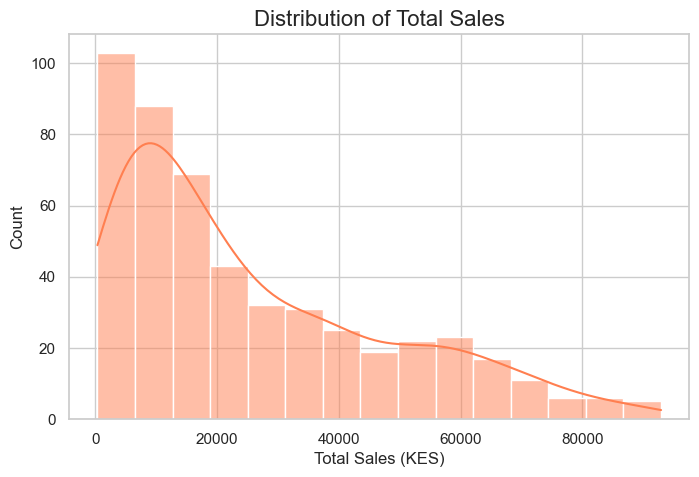

In [19]:
plt.figure(figsize=(8,5))
sns.histplot(df['Total_Sales'], bins=15, kde=True, color="coral")
plt.title("Distribution of Total Sales", fontsize=16)
plt.xlabel("Total Sales (KES)")
plt.show()


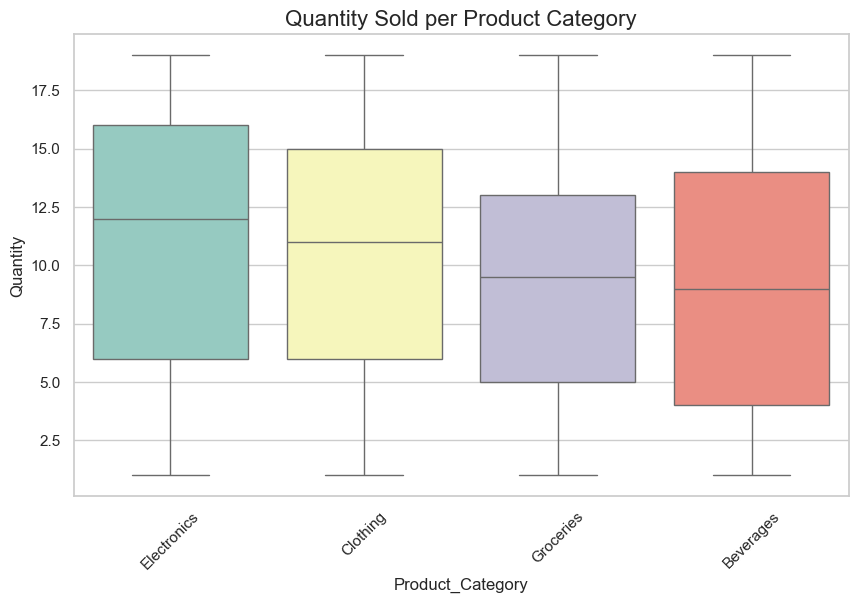

In [22]:
plt.figure(figsize=(10,6))
sns.boxplot(
    x='Product_Category',
    y='Quantity',
    hue='Product_Category',   
    data=df,
    palette="Set3",
    dodge=False,              
    legend=False              
)
plt.title("Quantity Sold per Product Category", fontsize=16)
plt.xticks(rotation=45)
plt.show()


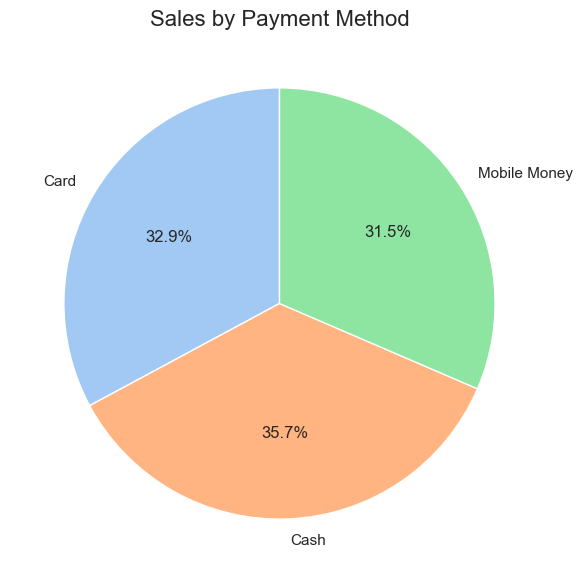

In [23]:
payment_sales = df.groupby('Payment_Method')['Total_Sales'].sum()
plt.figure(figsize=(7,7))
payment_sales.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.ylabel('')
plt.title("Sales by Payment Method", fontsize=16)
plt.show()


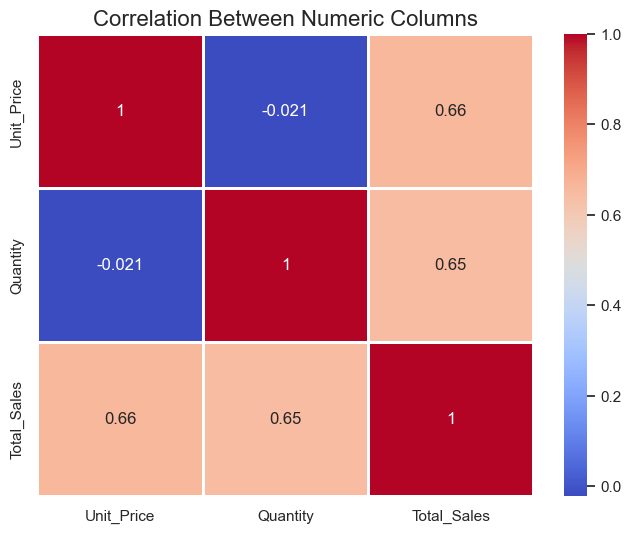

In [24]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['Unit_Price','Quantity','Total_Sales']].corr(), annot=True, cmap='coolwarm', linewidths=1)
plt.title("Correlation Between Numeric Columns", fontsize=16)
plt.show()


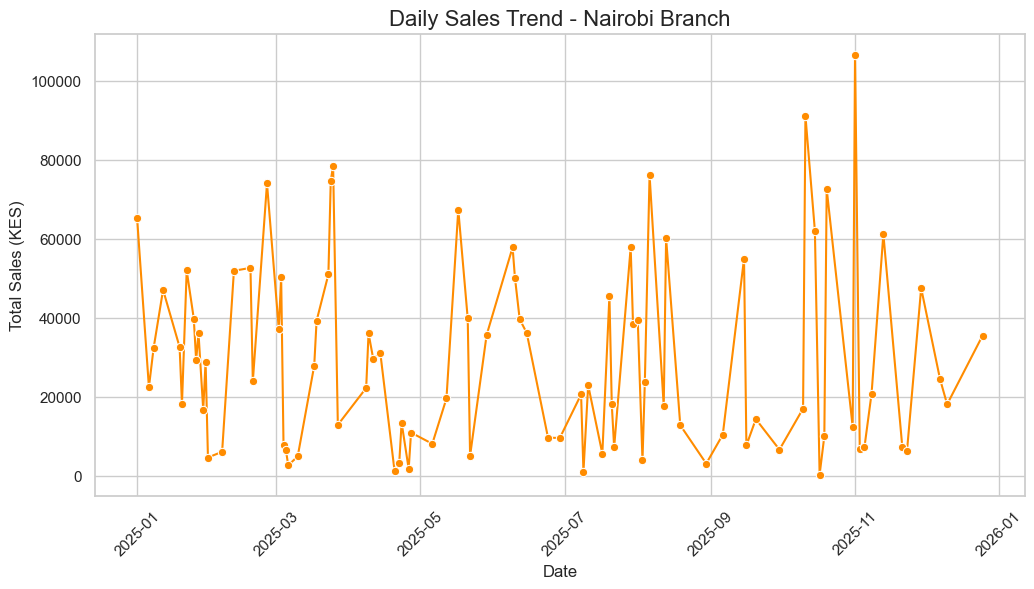

In [25]:
branch_name = "Nairobi"  # change to the branch you want
branch_data = df[df['Branch'] == branch_name]

daily_sales_branch = branch_data.groupby('Date')['Total_Sales'].sum()

plt.figure(figsize=(12,6))
sns.lineplot(x=daily_sales_branch.index, y=daily_sales_branch.values, marker='o', color="darkorange")
plt.title(f"Daily Sales Trend - {branch_name} Branch", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Total Sales (KES)")
plt.xticks(rotation=45)
plt.show()


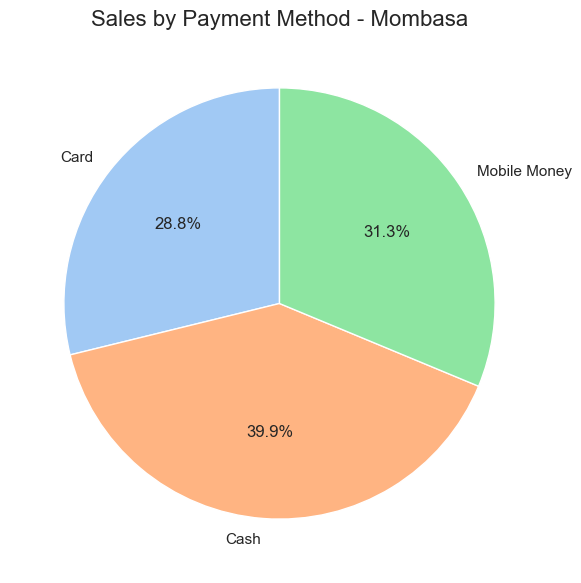

In [26]:
branch_name = "Mombasa"
branch_data = df[df['Branch'] == branch_name]

payment_sales_branch = branch_data.groupby('Payment_Method')['Total_Sales'].sum()

plt.figure(figsize=(7,7))
payment_sales_branch.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.ylabel('')
plt.title(f"Sales by Payment Method - {branch_name}", fontsize=16)
plt.show()


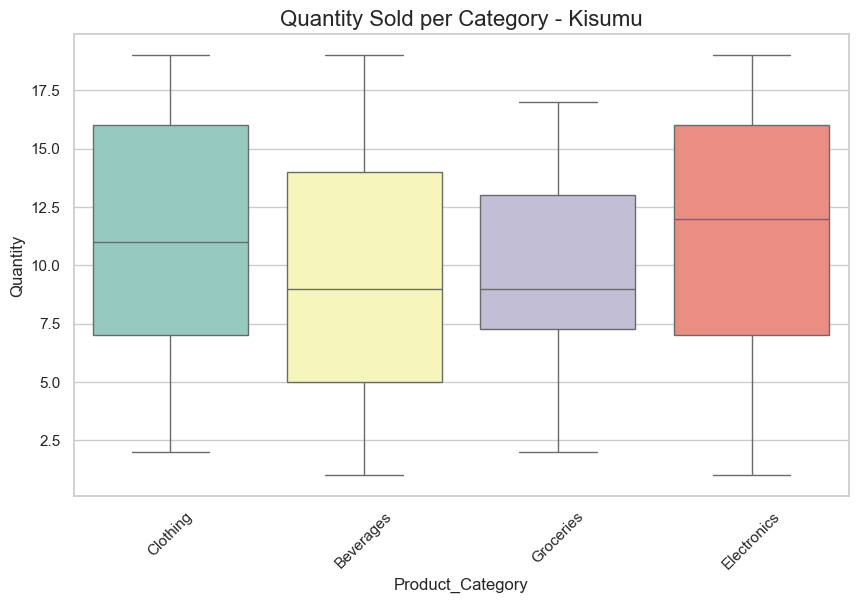

In [27]:
branch_name = "Kisumu"
branch_data = df[df['Branch'] == branch_name]

plt.figure(figsize=(10,6))
sns.boxplot(
    x='Product_Category', 
    y='Quantity', 
    hue='Product_Category', 
    data=branch_data, 
    palette="Set3",
    dodge=False,
    legend=False
)
plt.title(f"Quantity Sold per Category - {branch_name}", fontsize=16)
plt.xticks(rotation=45)
plt.show()
